In [9]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn

import numpy as np
from sklearn.model_selection import train_test_split

from ModelHelper2 import *
from ModelHelper2 import myNeural

from Dataset import DatasetRandom

from hyperopt import hp
from hyperopt import fmin, tpe, hp

from ray import tune

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Data

In [2]:
trainData = DatasetRandom(size = 10000)

testData = DatasetRandom(size = 2000)

# Hyper-Parameter Tunning

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Single Model Trial

In [ ]:
defaultConfig = {
    # 'input_shape':(20,20),
    'hidden_size': 300,
    'act_func_1': nn.ReLU,
    'act_func_2': nn.ReLU,
    
    'lossFunction': nn.BCEWithLogitsLoss, 
    'optimiser': torch.optim.SGD, 'lr': 0.1,
    'epoch': 2, 'batch_size': 128,
}

In [ ]:
singleModel = myNeural(defaultConfig)

In [ ]:
singleModel

In [ ]:
singleModel.optimise(trainData, testData, 
                     defaultConfig,
                    hideEpochProgressBar=False,
                    hideBatchProgressBar=False)

In [ ]:
singleModel.plotTraining()

# Hyper-Parameter Tuning

In [4]:
paramSpace = space = {
    # model parameters
    'hidden_size': hp.randint('hidden_size', 400, 512),
    'act_func_1': hp.choice('act_func_1', [nn.ReLU, nn.LeakyReLU, nn.Sigmoid, nn.Tanh]),
    'act_func_2': hp.choice('act_func_2', [nn.ReLU, nn.LeakyReLU, nn.Sigmoid, nn.Tanh]),
    
    # trainer parameters
    # 'optimiser': hp.choice('optimiser', [torch.optim.SGD, torch.optim.Adam, torch.optim.LBFGS]),
    'lr' : hp.uniform('lr', 0.1, 1.5),
    'epoch': 1+ hp.randint('epoch', 25),
    'batch_size': 1 + hp.randint('batch_size', 512),
}

In [17]:
from ModelHelper2 import myNeural

In [18]:
myNeural.hyperTuner(trainData, testData, paramSpace,
                   searchMaxConcurrent = 1)

2021-05-26 17:57:10,229	WARNING worker.py:1115 -- Warning: The actor ImplicitFunc has size 19252824 when pickled. It will be stored in Redis, which could cause memory issues. This may mean that its definition uses a large array or other object.


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr
fitTrain_bc997a9e,RUNNING,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349


Result for fitTrain_bc997a9e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-13
  done: false
  experiment_id: 5100bdac85b64fa7b5da856dd3cb1e6e
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70272
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1242)
  time_since_restore: 0.0695807933807373
  time_this_iter_s: 0.0695807933807373
  time_total_s: 0.0695807933807373
  timestamp: 1622023033
  timesteps_since_restore: 0
  trainAcc: tensor(0.8758)
  training_iteration: 1
  trial_id: bc997a9e
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_bc997a9e,RUNNING,192.168.1.254:70272,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,40,1.66784


2021-05-26 17:57:17,708	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_bc997a9e:
  _metric: tensor(0.5895)
  date: 2021-05-26_17-57-17
  done: true
  experiment_id: 5100bdac85b64fa7b5da856dd3cb1e6e
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70272
  testAcc: tensor(0.5895)
  testAccReg: tensor(0.1857)
  time_since_restore: 4.0777268409729
  time_this_iter_s: 0.04128718376159668
  time_total_s: 4.0777268409729
  timestamp: 1622023037
  timesteps_since_restore: 0
  trainAcc: tensor(0.9933)
  training_iteration: 100
  trial_id: bc997a9e
  


2021-05-26 17:57:20,761	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_c14ebdc4:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-20
  done: true
  experiment_id: 3cbb17acfba5452fadd5066bce6ee073
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70364
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.0157)
  time_since_restore: 0.0725240707397461
  time_this_iter_s: 0.0725240707397461
  time_total_s: 0.0725240707397461
  timestamp: 1622023040
  timesteps_since_restore: 0
  trainAcc: tensor(0.9843)
  training_iteration: 1
  trial_id: c14ebdc4
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241


Result for fitTrain_c323decc:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-23
  done: false
  experiment_id: 2ad69cbf89904d779ae141b364fc397b
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70366
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.3026)
  time_since_restore: 0.06956601142883301
  time_this_iter_s: 0.06956601142883301
  time_total_s: 0.06956601142883301
  timestamp: 1622023043
  timesteps_since_restore: 0
  trainAcc: tensor(0.6974)
  training_iteration: 1
  trial_id: c323decc
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_c323decc,RUNNING,192.168.1.254:70366,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,52,2.59399
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241


2021-05-26 17:57:26,421	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.ReLU'>}


Result for fitTrain_c323decc:
  _metric: tensor(0.5180)
  date: 2021-05-26_17-57-26
  done: true
  experiment_id: 2ad69cbf89904d779ae141b364fc397b
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70366
  testAcc: tensor(0.5180)
  testAccReg: tensor(0.)
  time_since_restore: 3.1804699897766113
  time_this_iter_s: 0.044157981872558594
  time_total_s: 3.1804699897766113
  timestamp: 1622023046
  timesteps_since_restore: 0
  trainAcc: tensor(0.)
  training_iteration: 64
  trial_id: c323decc
  


2021-05-26 17:57:28,783	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Sigmoid'>}


Result for fitTrain_c68051fe:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-28
  done: true
  experiment_id: 308c112a9fcd4008ae9283bca75dcded
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70362
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 0.06423711776733398
  time_this_iter_s: 0.06423711776733398
  time_total_s: 0.06423711776733398
  timestamp: 1622023048
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 1
  trial_id: c68051fe
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_c7e8dcdc,RUNNING,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,,
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371


Result for fitTrain_c7e8dcdc:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-31
  done: false
  experiment_id: 6d19ea86cf2a4e65bfb22e64cc052b59
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70378
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.3167)
  time_since_restore: 0.07109999656677246
  time_this_iter_s: 0.07109999656677246
  time_total_s: 0.07109999656677246
  timestamp: 1622023051
  timesteps_since_restore: 0
  trainAcc: tensor(0.3167)
  training_iteration: 1
  trial_id: c7e8dcdc
  


2021-05-26 17:57:34,652	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_c7e8dcdc:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-34
  done: true
  experiment_id: 6d19ea86cf2a4e65bfb22e64cc052b59
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70378
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 3.002588987350464
  time_this_iter_s: 0.04506206512451172
  time_total_s: 3.002588987350464
  timestamp: 1622023054
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 64
  trial_id: c7e8dcdc
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_cb682642,RUNNING,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,,
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259


2021-05-26 17:57:37,592	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Sigmoid'>}


Result for fitTrain_cb682642:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-37
  done: true
  experiment_id: 5d41b88392da43dd83297a5befdd4558
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70382
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 0.06773900985717773
  time_this_iter_s: 0.06773900985717773
  time_total_s: 0.06773900985717773
  timestamp: 1622023057
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 1
  trial_id: cb682642
  


2021-05-26 17:57:40,010	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_cd29120c:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-40
  done: true
  experiment_id: f548a88efc684fdb83c566c1fd83c035
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70384
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1809)
  time_since_restore: 0.05945277214050293
  time_this_iter_s: 0.05945277214050293
  time_total_s: 0.05945277214050293
  timestamp: 1622023060
  timesteps_since_restore: 0
  trainAcc: tensor(0.1809)
  training_iteration: 1
  trial_id: cd29120c
  


2021-05-26 17:57:42,827	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Sigmoid'>}


Result for fitTrain_ce9a0b96:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-42
  done: true
  experiment_id: 525603db9cc94cba90ffda186b9c6277
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70388
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 0.06135725975036621
  time_this_iter_s: 0.06135725975036621
  time_total_s: 0.06135725975036621
  timestamp: 1622023062
  timesteps_since_restore: 0
  trainAcc: tensor(0.)
  training_iteration: 1
  trial_id: ce9a0b96
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573


2021-05-26 17:57:47,012	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_d048679e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-47
  done: true
  experiment_id: c82f0e694e134895930bbaebcc8a32be
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70392
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1872)
  time_since_restore: 0.05781292915344238
  time_this_iter_s: 0.05781292915344238
  time_total_s: 0.05781292915344238
  timestamp: 1622023067
  timesteps_since_restore: 0
  trainAcc: tensor(0.1872)
  training_iteration: 1
  trial_id: d048679e
  


2021-05-26 17:57:49,423	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.ReLU'>}


Result for fitTrain_d2c6625a:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-49
  done: true
  experiment_id: 62f733064f2140ada71cccc81c49022a
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70390
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.0647)
  time_since_restore: 0.07101798057556152
  time_this_iter_s: 0.07101798057556152
  time_total_s: 0.07101798057556152
  timestamp: 1622023069
  timesteps_since_restore: 0
  trainAcc: tensor(0.0647)
  training_iteration: 1
  trial_id: d2c6625a
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129
fitTrain_d2c6625a,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,448,13,481,0.861905,1,0.071018


2021-05-26 17:57:52,122	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_d4371c4c:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-52
  done: true
  experiment_id: 04a3f8f7737d408d9f3f4d2ce7429dad
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70398
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.0167)
  time_since_restore: 0.062213897705078125
  time_this_iter_s: 0.062213897705078125
  time_total_s: 0.062213897705078125
  timestamp: 1622023072
  timesteps_since_restore: 0
  trainAcc: tensor(0.0167)
  training_iteration: 1
  trial_id: d4371c4c
  


2021-05-26 17:57:54,692	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_d5d5ec04:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-57-54
  done: true
  experiment_id: d7393ab94d2e4a20a847655e17fa2c65
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70402
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.0318)
  time_since_restore: 0.061167001724243164
  time_this_iter_s: 0.061167001724243164
  time_total_s: 0.061167001724243164
  timestamp: 1622023074
  timesteps_since_restore: 0
  trainAcc: tensor(0.0318)
  training_iteration: 1
  trial_id: d5d5ec04
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129
fitTrain_d2c6625a,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,448,13,481,0.861905,1,0.071018


2021-05-26 17:58:02,026	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_d75af3ee:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-02
  done: true
  experiment_id: 365dd064577e44b48cec383f8d58fca2
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70406
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.0667)
  time_since_restore: 0.12419891357421875
  time_this_iter_s: 0.12419891357421875
  time_total_s: 0.12419891357421875
  timestamp: 1622023082
  timesteps_since_restore: 0
  trainAcc: tensor(0.0667)
  training_iteration: 1
  trial_id: d75af3ee
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129
fitTrain_d2c6625a,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,448,13,481,0.861905,1,0.071018


Result for fitTrain_dbbb060e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-06
  done: false
  experiment_id: 4be29c3be54040a1a88b87ab2046fe5c
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70404
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1831)
  time_since_restore: 0.09927606582641602
  time_this_iter_s: 0.09927606582641602
  time_total_s: 0.09927606582641602
  timestamp: 1622023086
  timesteps_since_restore: 0
  trainAcc: tensor(0.1831)
  training_iteration: 1
  trial_id: dbbb060e
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_dbbb060e,RUNNING,192.168.1.254:70404,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,344,19,480,1.16684,8,0.539358
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:58:09,659	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.ReLU'>}


Result for fitTrain_dbbb060e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-09
  done: true
  experiment_id: 4be29c3be54040a1a88b87ab2046fe5c
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70404
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 3.142261028289795
  time_this_iter_s: 0.038465023040771484
  time_total_s: 3.142261028289795
  timestamp: 1622023089
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 64
  trial_id: dbbb060e
  
Result for fitTrain_e04622f8:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-13
  done: false
  experiment_id: 75849837c972481d9475316df610f04b
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70412
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1976)
  time_since_restore: 0.060263872146606445
  time_this_iter_s: 0.060263872146606445
  time_total_s: 0.060263872146606445
  timestamp: 1622023093
  timesteps_since_restore: 0
  tr

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_e04622f8,RUNNING,192.168.1.254:70412,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,329,7,417,1.32688,1,0.0602639
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:58:15,347	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.ReLU'>}


Result for fitTrain_e04622f8:
  _metric: tensor(0.5015)
  date: 2021-05-26_17-58-15
  done: true
  experiment_id: 75849837c972481d9475316df610f04b
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70412
  testAcc: tensor(0.5015)
  testAccReg: tensor(0.0030)
  time_since_restore: 2.2919938564300537
  time_this_iter_s: 0.03338289260864258
  time_total_s: 2.2919938564300537
  timestamp: 1622023095
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 64
  trial_id: e04622f8
  
Result for fitTrain_e3a9d408:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-18
  done: false
  experiment_id: 62d3d1aac08943e2a6ac083f1f0ec8c6
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70416
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.3288)
  time_since_restore: 0.06167030334472656
  time_this_iter_s: 0.06167030334472656
  time_total_s: 0.06167030334472656
  timestamp: 1622023098
  timesteps_since_restore: 0
  

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_e3a9d408,RUNNING,192.168.1.254:70416,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.ReLU'>,146,14,511,1.25069,2,0.10838
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:58:20,610	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.ReLU'>}


Result for fitTrain_e3a9d408:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-20
  done: true
  experiment_id: 62d3d1aac08943e2a6ac083f1f0ec8c6
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70416
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 2.574854850769043
  time_this_iter_s: 0.039876699447631836
  time_total_s: 2.574854850769043
  timestamp: 1622023100
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 64
  trial_id: e3a9d408
  


2021-05-26 17:58:23,107	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Sigmoid'>}


Result for fitTrain_e6ccfcaa:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-23
  done: true
  experiment_id: abf8cbf6ae3c4d7a8ea9d48231632854
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70414
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 0.07212591171264648
  time_this_iter_s: 0.07212591171264648
  time_total_s: 0.07212591171264648
  timestamp: 1622023103
  timesteps_since_restore: 0
  trainAcc: tensor(0.)
  training_iteration: 1
  trial_id: e6ccfcaa
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_e84a06f4,RUNNING,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.ReLU'>,32,10,406,1.48115,,
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:58:25,399	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.ReLU'>}


Result for fitTrain_e84a06f4:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-25
  done: true
  experiment_id: 90ad79cc468e4dd7acf0354361f5a5de
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70429
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1562)
  time_since_restore: 0.04313516616821289
  time_this_iter_s: 0.04313516616821289
  time_total_s: 0.04313516616821289
  timestamp: 1622023105
  timesteps_since_restore: 0
  trainAcc: tensor(0.1562)
  training_iteration: 1
  trial_id: e84a06f4
  


2021-05-26 17:58:27,533	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Sigmoid'>}


Result for fitTrain_e9a804d8:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-27
  done: true
  experiment_id: 70626d8f34d842f980f7b110101d02d0
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70432
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 0.04812788963317871
  time_this_iter_s: 0.04812788963317871
  time_total_s: 0.04812788963317871
  timestamp: 1622023107
  timesteps_since_restore: 0
  trainAcc: tensor(0.)
  training_iteration: 1
  trial_id: e9a804d8
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_eaed4c5e,RUNNING,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.LeakyReLU'>,296,14,404,1.23621,,
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


Result for fitTrain_eaed4c5e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-30
  done: false
  experiment_id: e0fe460f93ec4774a5eaf346abdf2d21
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70437
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.3446)
  time_since_restore: 0.053434133529663086
  time_this_iter_s: 0.053434133529663086
  time_total_s: 0.053434133529663086
  timestamp: 1622023110
  timesteps_since_restore: 0
  trainAcc: tensor(0.6554)
  training_iteration: 1
  trial_id: eaed4c5e
  


2021-05-26 17:58:32,115	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_eaed4c5e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-32
  done: true
  experiment_id: e0fe460f93ec4774a5eaf346abdf2d21
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70437
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 2.0248100757598877
  time_this_iter_s: 0.030251026153564453
  time_total_s: 2.0248100757598877
  timestamp: 1622023112
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 64
  trial_id: eaed4c5e
  
Result for fitTrain_eda85c2c:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-34
  done: false
  experiment_id: efbc415102a34fa0add027dba129a80f
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70439
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.3668)
  time_since_restore: 0.06044602394104004
  time_this_iter_s: 0.06044602394104004
  time_total_s: 0.06044602394104004
  timestamp: 1622023114
  timesteps_since_restore: 0
  tra

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_eda85c2c,RUNNING,192.168.1.254:70439,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,199,9,458,0.709586,1,0.060446
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:58:36,540	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_eda85c2c:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-36
  done: true
  experiment_id: efbc415102a34fa0add027dba129a80f
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70439
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 2.333595037460327
  time_this_iter_s: 0.03512716293334961
  time_total_s: 2.333595037460327
  timestamp: 1622023116
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 64
  trial_id: eda85c2c
  
Result for fitTrain_f04b8738:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-39
  done: false
  experiment_id: c3121222c8404df089ad3ff0fa1debc0
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70446
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.3828)
  time_since_restore: 0.0530092716217041
  time_this_iter_s: 0.0530092716217041
  time_total_s: 0.0530092716217041
  timestamp: 1622023119
  timesteps_since_restore: 0
  trainAcc:

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_f04b8738,RUNNING,192.168.1.254:70446,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,209,24,404,1.03291,6,0.223924
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:58:41,197	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_f04b8738:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-41
  done: true
  experiment_id: c3121222c8404df089ad3ff0fa1debc0
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70446
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 2.0870699882507324
  time_this_iter_s: 0.030362844467163086
  time_total_s: 2.0870699882507324
  timestamp: 1622023121
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 64
  trial_id: f04b8738
  


2021-05-26 17:58:43,503	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.ReLU'>}


Result for fitTrain_f312240e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-43
  done: true
  experiment_id: 7bbe9b486b024298bfcc7b73cbd26f50
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70448
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.2328)
  time_since_restore: 0.061971187591552734
  time_this_iter_s: 0.061971187591552734
  time_total_s: 0.061971187591552734
  timestamp: 1622023123
  timesteps_since_restore: 0
  trainAcc: tensor(0.2328)
  training_iteration: 1
  trial_id: f312240e
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_f47254c2,RUNNING,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,381,23,479,1.02873,,
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


Result for fitTrain_f47254c2:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-45
  done: false
  experiment_id: 0da56bb2cb1a4afc91fa9045bbbea8b5
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70451
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.2730)
  time_since_restore: 0.06878995895385742
  time_this_iter_s: 0.06878995895385742
  time_total_s: 0.06878995895385742
  timestamp: 1622023125
  timesteps_since_restore: 0
  trainAcc: tensor(0.2730)
  training_iteration: 1
  trial_id: f47254c2
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_f47254c2,RUNNING,192.168.1.254:70451,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,381,23,479,1.02873,85,3.7328
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:58:50,098	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_f47254c2:
  _metric: tensor(0.7545)
  date: 2021-05-26_17-58-50
  done: true
  experiment_id: 0da56bb2cb1a4afc91fa9045bbbea8b5
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70451
  testAcc: tensor(0.7545)
  testAccReg: tensor(0.5274)
  time_since_restore: 4.401116132736206
  time_this_iter_s: 0.042952775955200195
  time_total_s: 4.401116132736206
  timestamp: 1622023130
  timesteps_since_restore: 0
  trainAcc: tensor(0.9816)
  training_iteration: 100
  trial_id: f47254c2
  
Result for fitTrain_f8605c50:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-52
  done: false
  experiment_id: 262226556313489680faefebb6032ed9
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70456
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.4569)
  time_since_restore: 0.05975198745727539
  time_this_iter_s: 0.05975198745727539
  time_total_s: 0.05975198745727539
  timestamp: 1622023132
  timesteps_since_restore:

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_f8605c50,RUNNING,192.168.1.254:70456,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,348,23,407,1.42542,44,1.64672
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:58:56,721	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_f8605c50:
  _metric: tensor(0.4995)
  date: 2021-05-26_17-58-56
  done: true
  experiment_id: 262226556313489680faefebb6032ed9
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70456
  testAcc: tensor(0.4995)
  testAccReg: tensor(-0.0010)
  time_since_restore: 3.9524729251861572
  time_this_iter_s: 0.06696105003356934
  time_total_s: 3.9524729251861572
  timestamp: 1622023136
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 100
  trial_id: f8605c50
  
Result for fitTrain_fc52ee0e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-58-58
  done: false
  experiment_id: 25003f0085d44bd1bfdc769e2867952f
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70460
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.3753)
  time_since_restore: 0.06428694725036621
  time_this_iter_s: 0.06428694725036621
  time_total_s: 0.06428694725036621
  timestamp: 1622023138
  timesteps_since_restore: 0

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_fc52ee0e,RUNNING,192.168.1.254:70460,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,381,3,433,0.998081,13,0.545879
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:59:02,084	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_fc52ee0e:
  _metric: tensor(0.6270)
  date: 2021-05-26_17-59-02
  done: true
  experiment_id: 25003f0085d44bd1bfdc769e2867952f
  experiment_tag: 26_act_func_1=<class 'torch.nn.modules.activation.Tanh'>,act_func_2=<class
    'torch.nn.modules.activation.LeakyReLU'>,batch_size=381,epoch=3,hidden_size=433,lr=0.99808
  hostname: Shaos-MBP
  iterations_since_restore: 81
  node_ip: 192.168.1.254
  pid: 70460
  testAcc: tensor(0.6270)
  testAccReg: tensor(0.2540)
  time_since_restore: 3.1845510005950928
  time_this_iter_s: 0.029201984405517578
  time_total_s: 3.1845510005950928
  timestamp: 1622023142
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 81
  trial_id: fc52ee0e
  


2021-05-26 17:59:04,252	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_ff85518e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-04
  done: true
  experiment_id: 94bbab21bec248f49130a9b61447908a
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70457
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1948)
  time_since_restore: 0.0607149600982666
  time_this_iter_s: 0.0607149600982666
  time_total_s: 0.0607149600982666
  timestamp: 1622023144
  timesteps_since_restore: 0
  trainAcc: tensor(0.8052)
  training_iteration: 1
  trial_id: ff85518e
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_00d02280,RUNNING,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,,
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129


2021-05-26 17:59:06,679	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_00d02280:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-06
  done: true
  experiment_id: 9d27a534ad6a4a4f843bf863cc5e6fb9
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70466
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.2696)
  time_since_restore: 0.06148886680603027
  time_this_iter_s: 0.06148886680603027
  time_total_s: 0.06148886680603027
  timestamp: 1622023146
  timesteps_since_restore: 0
  trainAcc: tensor(0.2696)
  training_iteration: 1
  trial_id: 00d02280
  


2021-05-26 17:59:09,250	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_0242f5fc:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-09
  done: true
  experiment_id: 46ccb06de1f543b5af9ff42046975d16
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70471
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.2128)
  time_since_restore: 0.05954909324645996
  time_this_iter_s: 0.05954909324645996
  time_total_s: 0.05954909324645996
  timestamp: 1622023149
  timesteps_since_restore: 0
  trainAcc: tensor(0.2128)
  training_iteration: 1
  trial_id: 0242f5fc
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_03caeb00,RUNNING,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,,
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528


2021-05-26 17:59:11,467	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_03caeb00:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-11
  done: true
  experiment_id: f1fca1da49664bd887ebeb498c579871
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70475
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1488)
  time_since_restore: 0.06365394592285156
  time_this_iter_s: 0.06365394592285156
  time_total_s: 0.06365394592285156
  timestamp: 1622023151
  timesteps_since_restore: 0
  trainAcc: tensor(0.1488)
  training_iteration: 1
  trial_id: 03caeb00
  


2021-05-26 17:59:13,674	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_051d3972:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-13
  done: true
  experiment_id: c6c9d7a6392d474886394b1b5f3983e1
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70473
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1958)
  time_since_restore: 0.06474494934082031
  time_this_iter_s: 0.06474494934082031
  time_total_s: 0.06474494934082031
  timestamp: 1622023153
  timesteps_since_restore: 0
  trainAcc: tensor(0.8042)
  training_iteration: 1
  trial_id: 051d3972
  
Result for fitTrain_066dda8e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-15
  done: false
  experiment_id: dc79c0d904d64d8baa455cabcc48c23d
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70479
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.4398)
  time_since_restore: 0.06000685691833496
  time_this_iter_s: 0.06000685691833496
  time_total_s: 0.06000685691833496
  timestamp: 1622023155
  timesteps_since_restore: 

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_066dda8e,RUNNING,192.168.1.254:70479,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,1,0.0600069
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259


2021-05-26 17:59:19,374	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_066dda8e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-19
  done: true
  experiment_id: dc79c0d904d64d8baa455cabcc48c23d
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70479
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 3.594062089920044
  time_this_iter_s: 0.03492307662963867
  time_total_s: 3.594062089920044
  timestamp: 1622023159
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 100
  trial_id: 066dda8e
  


2021-05-26 17:59:21,903	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_09d39510:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-21
  done: true
  experiment_id: f34fa2071a8b470c967742a3eb6941f4
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70484
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.2277)
  time_since_restore: 0.050656795501708984
  time_this_iter_s: 0.050656795501708984
  time_total_s: 0.050656795501708984
  timestamp: 1622023161
  timesteps_since_restore: 0
  trainAcc: tensor(0.2277)
  training_iteration: 1
  trial_id: 09d39510
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371


2021-05-26 17:59:26,034	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_0b56df1e:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-26
  done: true
  experiment_id: cce54c06f5d74ee695c8bd8c5bf5cb1f
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70488
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 0.06275415420532227
  time_this_iter_s: 0.06275415420532227
  time_total_s: 0.06275415420532227
  timestamp: 1622023166
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 1
  trial_id: 0b56df1e
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_0dd04fe6,RUNNING,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,,
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241


2021-05-26 17:59:28,261	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.LeakyReLU'>}


Result for fitTrain_0dd04fe6:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-28
  done: true
  experiment_id: 66f592dbdf85407ea8b3d985233691e0
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70486
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1562)
  time_since_restore: 0.06432795524597168
  time_this_iter_s: 0.06432795524597168
  time_total_s: 0.06432795524597168
  timestamp: 1622023168
  timesteps_since_restore: 0
  trainAcc: tensor(0.1562)
  training_iteration: 1
  trial_id: 0dd04fe6
  
Result for fitTrain_0f1fcb74:
  _metric: tensor(0.5065)
  date: 2021-05-26_17-59-30
  done: false
  experiment_id: 2e7211dd5da7468da8faf380847e7ca2
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70493
  testAcc: tensor(0.5065)
  testAccReg: tensor(0.4774)
  time_since_restore: 0.07324600219726562
  time_this_iter_s: 0.07324600219726562
  time_total_s: 0.07324600219726562
  timestamp: 1622023170
  timesteps_since_restore: 

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_0f1fcb74,RUNNING,192.168.1.254:70493,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,32,1.65526
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773


2021-05-26 17:59:35,533	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_0f1fcb74:
  _metric: tensor(0.7760)
  date: 2021-05-26_17-59-35
  done: false
  experiment_id: 2e7211dd5da7468da8faf380847e7ca2
  hostname: Shaos-MBP
  iterations_since_restore: 99
  node_ip: 192.168.1.254
  pid: 70493
  testAcc: tensor(0.7760)
  testAccReg: tensor(0.5599)
  time_since_restore: 5.099628925323486
  time_this_iter_s: 0.0502629280090332
  time_total_s: 5.099628925323486
  timestamp: 1622023175
  timesteps_since_restore: 0
  trainAcc: tensor(0.9921)
  training_iteration: 99
  trial_id: 0f1fcb74
  
Result for fitTrain_0f1fcb74:
  _metric: tensor(0.7725)
  date: 2021-05-26_17-59-35
  done: true
  experiment_id: 2e7211dd5da7468da8faf380847e7ca2
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70493
  testAcc: tensor(0.7725)
  testAccReg: tensor(0.5476)
  time_since_restore: 5.146917819976807
  time_this_iter_s: 0.04728889465332031
  time_total_s: 5.146917819976807
  timestamp: 1622023175
  timesteps_since_restore: 0
  t

2021-05-26 17:59:37,760	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_13753dda:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-37
  done: true
  experiment_id: b613128f283445759d9c2dcb941f0d2e
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70498
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.0159)
  time_since_restore: 0.07015013694763184
  time_this_iter_s: 0.07015013694763184
  time_total_s: 0.07015013694763184
  timestamp: 1622023177
  timesteps_since_restore: 0
  trainAcc: tensor(0.0159)
  training_iteration: 1
  trial_id: 13753dda
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692
fitTrain_13753dda,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,439,5,463,0.308947,1,0.0701501


Result for fitTrain_14cea8ba:
  _metric: tensor(0.4995)
  date: 2021-05-26_17-59-39
  done: false
  experiment_id: 0d2052b06ce945a6937fb74d35f3a7df
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70496
  testAcc: tensor(0.4995)
  testAccReg: tensor(0.4662)
  time_since_restore: 0.06951498985290527
  time_this_iter_s: 0.06951498985290527
  time_total_s: 0.06951498985290527
  timestamp: 1622023179
  timesteps_since_restore: 0
  trainAcc: tensor(0.5328)
  training_iteration: 1
  trial_id: 14cea8ba
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_14cea8ba,RUNNING,192.168.1.254:70496,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,381,20,463,0.607219,62,2.88926
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


2021-05-26 17:59:44,531	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_14cea8ba:
  _metric: tensor(0.7775)
  date: 2021-05-26_17-59-44
  done: true
  experiment_id: 0d2052b06ce945a6937fb74d35f3a7df
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70496
  testAcc: tensor(0.7775)
  testAccReg: tensor(0.5707)
  time_since_restore: 4.604206800460815
  time_this_iter_s: 0.04345393180847168
  time_total_s: 4.604206800460815
  timestamp: 1622023184
  timesteps_since_restore: 0
  trainAcc: tensor(0.9843)
  training_iteration: 100
  trial_id: 14cea8ba
  
Result for fitTrain_18d23300:
  _metric: tensor(0.4875)
  date: 2021-05-26_17-59-47
  done: false
  experiment_id: 9588fd325a4e4fb2a1e1a93d7daa4d50
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70508
  testAcc: tensor(0.4875)
  testAccReg: tensor(0.3889)
  time_since_restore: 0.05765104293823242
  time_this_iter_s: 0.05765104293823242
  time_total_s: 0.05765104293823242
  timestamp: 1622023187
  timesteps_since_restore: 

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_18d23300,RUNNING,192.168.1.254:70508,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,126,16,438,0.361232,23,0.830147
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


2021-05-26 17:59:50,443	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_18d23300:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-50
  done: true
  experiment_id: 9588fd325a4e4fb2a1e1a93d7daa4d50
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70508
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 3.4496490955352783
  time_this_iter_s: 0.033860206604003906
  time_total_s: 3.4496490955352783
  timestamp: 1622023190
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 100
  trial_id: 18d23300
  
Result for fitTrain_1c5855c2:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-52
  done: false
  experiment_id: 23aba5f5cce94d3ca1996d81c1a26090
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70512
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.3882)
  time_since_restore: 0.06845688819885254
  time_this_iter_s: 0.06845688819885254
  time_total_s: 0.06845688819885254
  timestamp: 1622023192
  timesteps_since_restore: 0
  t

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_1c5855c2,RUNNING,192.168.1.254:70512,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Tanh'>,389,20,463,0.119165,7,0.338815
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


2021-05-26 17:59:55,320	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_1c5855c2:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-55
  done: true
  experiment_id: 23aba5f5cce94d3ca1996d81c1a26090
  hostname: Shaos-MBP
  iterations_since_restore: 64
  node_ip: 192.168.1.254
  pid: 70512
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 2.769758939743042
  time_this_iter_s: 0.04314994812011719
  time_total_s: 2.769758939743042
  timestamp: 1622023195
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 64
  trial_id: 1c5855c2
  


2021-05-26 17:59:57,500	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_1f409f92:
  _metric: tensor(0.5000)
  date: 2021-05-26_17-59-57
  done: true
  experiment_id: 1709e4ce4fa1403aa56d541a44bbe529
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70510
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.0428)
  time_since_restore: 0.07062292098999023
  time_this_iter_s: 0.07062292098999023
  time_total_s: 0.07062292098999023
  timestamp: 1622023197
  timesteps_since_restore: 0
  trainAcc: tensor(0.9572)
  training_iteration: 1
  trial_id: 1f409f92
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_208d44a4,RUNNING,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,419,1,465,0.409174,,
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


Result for fitTrain_208d44a4:
  _metric: tensor(0.5005)
  date: 2021-05-26_18-00-00
  done: false
  experiment_id: 0c8ad47968ba4c8c81672ba87f548d64
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70520
  testAcc: tensor(0.5005)
  testAccReg: tensor(0.4449)
  time_since_restore: 0.0737457275390625
  time_this_iter_s: 0.0737457275390625
  time_total_s: 0.0737457275390625
  timestamp: 1622023200
  timesteps_since_restore: 0
  trainAcc: tensor(0.5561)
  training_iteration: 1
  trial_id: 208d44a4
  


2021-05-26 18:00:01,324	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_208d44a4:
  _metric: tensor(0.7285)
  date: 2021-05-26_18-00-01
  done: true
  experiment_id: 0c8ad47968ba4c8c81672ba87f548d64
  experiment_tag: 42_act_func_1=<class 'torch.nn.modules.activation.Tanh'>,act_func_2=<class
    'torch.nn.modules.activation.Tanh'>,batch_size=419,epoch=1,hidden_size=465,lr=0.40917
  hostname: Shaos-MBP
  iterations_since_restore: 24
  node_ip: 192.168.1.254
  pid: 70520
  testAcc: tensor(0.7285)
  testAccReg: tensor(0.4790)
  time_since_restore: 1.194624662399292
  time_this_iter_s: 0.04462599754333496
  time_total_s: 1.194624662399292
  timestamp: 1622023201
  timesteps_since_restore: 0
  trainAcc: tensor(0.9780)
  training_iteration: 24
  trial_id: 208d44a4
  


2021-05-26 18:00:03,496	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_22d494a6:
  _metric: tensor(0.5000)
  date: 2021-05-26_18-00-03
  done: true
  experiment_id: 383ac434f09243ac81c85ca41c2ad7fb
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70524
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1818)
  time_since_restore: 0.05501103401184082
  time_this_iter_s: 0.05501103401184082
  time_total_s: 0.05501103401184082
  timestamp: 1622023203
  timesteps_since_restore: 0
  trainAcc: tensor(0.8182)
  training_iteration: 1
  trial_id: 22d494a6
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692
fitTrain_13753dda,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,439,5,463,0.308947,1,0.0701501


Result for fitTrain_242181d4:
  _metric: tensor(0.4945)
  date: 2021-05-26_18-00-07
  done: false
  experiment_id: 0ee439702d0d4a1ca06b8225e9f5dce8
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70522
  testAcc: tensor(0.4945)
  testAccReg: tensor(0.4198)
  time_since_restore: 0.05221915245056152
  time_this_iter_s: 0.05221915245056152
  time_total_s: 0.05221915245056152
  timestamp: 1622023207
  timesteps_since_restore: 0
  trainAcc: tensor(0.5692)
  training_iteration: 1
  trial_id: 242181d4
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_242181d4,RUNNING,192.168.1.254:70522,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,65,5,405,0.636728,32,1.00687
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


2021-05-26 18:00:10,601	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_242181d4:
  _metric: tensor(0.6740)
  date: 2021-05-26_18-00-10
  done: true
  experiment_id: 0ee439702d0d4a1ca06b8225e9f5dce8
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70522
  testAcc: tensor(0.6740)
  testAccReg: tensor(0.3634)
  time_since_restore: 3.0896859169006348
  time_this_iter_s: 0.030693769454956055
  time_total_s: 3.0896859169006348
  timestamp: 1622023210
  timesteps_since_restore: 0
  trainAcc: tensor(0.9846)
  training_iteration: 100
  trial_id: 242181d4
  


2021-05-26 18:00:13,215	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_285c5f4e:
  _metric: tensor(0.5000)
  date: 2021-05-26_18-00-13
  done: true
  experiment_id: 91eb97ff09ff49ddb6cc38691871ec3d
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70530
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.0667)
  time_since_restore: 0.06998109817504883
  time_this_iter_s: 0.06998109817504883
  time_total_s: 0.06998109817504883
  timestamp: 1622023213
  timesteps_since_restore: 0
  trainAcc: tensor(0.9333)
  training_iteration: 1
  trial_id: 285c5f4e
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_29eb4e60,RUNNING,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,168,12,463,0.453943,,
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


Result for fitTrain_29eb4e60:
  _metric: tensor(0.4870)
  date: 2021-05-26_18-00-15
  done: false
  experiment_id: a98e985b9327426fb4e3212676a52401
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70534
  testAcc: tensor(0.4870)
  testAccReg: tensor(0.4226)
  time_since_restore: 0.06441617012023926
  time_this_iter_s: 0.06441617012023926
  time_total_s: 0.06441617012023926
  timestamp: 1622023215
  timesteps_since_restore: 0
  trainAcc: tensor(0.4226)
  training_iteration: 1
  trial_id: 29eb4e60
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_29eb4e60,RUNNING,192.168.1.254:70534,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,168,12,463,0.453943,61,3.04016
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


2021-05-26 18:00:20,537	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_29eb4e60:
  _metric: tensor(0.7540)
  date: 2021-05-26_18-00-20
  done: true
  experiment_id: a98e985b9327426fb4e3212676a52401
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70534
  testAcc: tensor(0.7540)
  testAccReg: tensor(0.5616)
  time_since_restore: 4.98923397064209
  time_this_iter_s: 0.03406167030334473
  time_total_s: 4.98923397064209
  timestamp: 1622023220
  timesteps_since_restore: 0
  trainAcc: tensor(0.9464)
  training_iteration: 100
  trial_id: 29eb4e60
  


2021-05-26 18:00:23,103	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.ReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Sigmoid'>}


Result for fitTrain_2e484d82:
  _metric: tensor(0.5000)
  date: 2021-05-26_18-00-23
  done: true
  experiment_id: 6a5f13f367bb4a8392f1df2ca85cad8b
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70532
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 0.07367825508117676
  time_this_iter_s: 0.07367825508117676
  time_total_s: 0.07367825508117676
  timestamp: 1622023223
  timesteps_since_restore: 0
  trainAcc: tensor(1.)
  training_iteration: 1
  trial_id: 2e484d82
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_2fcff3ee,RUNNING,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,387,7,422,0.588603,,
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


2021-05-26 18:00:25,729	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.LeakyReLU'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_2fcff3ee:
  _metric: tensor(0.5000)
  date: 2021-05-26_18-00-25
  done: true
  experiment_id: f1c7658aad014ec090706e5105aaf44d
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70541
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.1085)
  time_since_restore: 0.06516408920288086
  time_this_iter_s: 0.06516408920288086
  time_total_s: 0.06516408920288086
  timestamp: 1622023225
  timesteps_since_restore: 0
  trainAcc: tensor(0.1085)
  training_iteration: 1
  trial_id: 2fcff3ee
  
Result for fitTrain_3160d50c:
  _metric: tensor(0.4980)
  date: 2021-05-26_18-00-28
  done: false
  experiment_id: 52181589484c443aa0447fd0433fbcc7
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70543
  testAcc: tensor(0.4980)
  testAccReg: tensor(0.4589)
  time_since_restore: 0.0586550235748291
  time_this_iter_s: 0.0586550235748291
  time_total_s: 0.0586550235748291
  timestamp: 1622023228
  timesteps_since_restore: 0
 

Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_3160d50c,RUNNING,192.168.1.254:70543,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,207,19,426,0.298113,15,0.590179
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692


2021-05-26 18:00:32,294	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Tanh'>, 'act_func_2': <class 'torch.nn.modules.activation.Tanh'>}


Result for fitTrain_3160d50c:
  _metric: tensor(0.7800)
  date: 2021-05-26_18-00-32
  done: true
  experiment_id: 52181589484c443aa0447fd0433fbcc7
  hostname: Shaos-MBP
  iterations_since_restore: 100
  node_ip: 192.168.1.254
  pid: 70543
  testAcc: tensor(0.7800)
  testAccReg: tensor(0.6957)
  time_since_restore: 4.250500202178955
  time_this_iter_s: 0.036763906478881836
  time_total_s: 4.250500202178955
  timestamp: 1622023232
  timesteps_since_restore: 0
  trainAcc: tensor(0.6957)
  training_iteration: 100
  trial_id: 3160d50c
  


2021-05-26 18:00:35,969	INFO logger.py:688 -- Removed the following hyperparameter values when logging to tensorboard: {'act_func_1': <class 'torch.nn.modules.activation.Sigmoid'>, 'act_func_2': <class 'torch.nn.modules.activation.Sigmoid'>}


Result for fitTrain_354a3d5c:
  _metric: tensor(0.5000)
  date: 2021-05-26_18-00-35
  done: true
  experiment_id: 0516a0a0990649fa8bb982bb97a3f683
  hostname: Shaos-MBP
  iterations_since_restore: 1
  node_ip: 192.168.1.254
  pid: 70552
  testAcc: tensor(0.5000)
  testAccReg: tensor(0.)
  time_since_restore: 0.14324021339416504
  time_this_iter_s: 0.14324021339416504
  time_total_s: 0.14324021339416504
  timestamp: 1622023235
  timesteps_since_restore: 0
  trainAcc: tensor(0.)
  training_iteration: 1
  trial_id: 354a3d5c
  


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_00d02280,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,115,21,479,1.03995,1,0.0614889
fitTrain_0242f5fc,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,141,23,504,0.667207,1,0.0595491
fitTrain_03caeb00,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,289,4,473,0.782057,1,0.0636539
fitTrain_051d3972,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,424,3,433,1.36659,1,0.0647449
fitTrain_066dda8e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,216,22,449,0.987288,100,3.59406
fitTrain_09d39510,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,101,6,409,0.558499,1,0.0506568
fitTrain_0b56df1e,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,351,2,466,0.791202,1,0.0627542
fitTrain_0dd04fe6,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,288,3,470,1.12211,1,0.064328
fitTrain_0f1fcb74,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.Tanh'>,506,5,463,0.609421,100,5.14692
fitTrain_13753dda,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,439,5,463,0.308947,1,0.0701501


Trial name,status,loc,act_func_1,act_func_2,batch_size,epoch,hidden_size,lr,iter,total time (s)
fitTrain_bc997a9e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349,100,4.07773
fitTrain_c14ebdc4,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032,1,0.0725241
fitTrain_c323decc,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.14908,64,3.18047
fitTrain_c68051fe,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162,1,0.0642371
fitTrain_c7e8dcdc,TERMINATED,,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.14387,64,3.00259
fitTrain_cb682642,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493,1,0.067739
fitTrain_cd29120c,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641,1,0.0594528
fitTrain_ce9a0b96,TERMINATED,,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.25319,1,0.0613573
fitTrain_d048679e,TERMINATED,,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.26594,1,0.0578129
fitTrain_d2c6625a,TERMINATED,,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,448,13,481,0.861905,1,0.071018


2021-05-26 18:00:36,172	INFO tune.py:549 -- Total run time: 206.50 seconds (206.18 seconds for the tuning loop).


In [29]:
myNeural.analysis.results_df

,trainAcc,testAcc,testAccReg,_metric,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,...,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.act_func_1,config.act_func_2,config.batch_size,config.epoch,config.hidden_size,config.lr
trial_id,,,,,,,,,,,,,,,,,,,,,
bc997a9e,tensor(0.9933),tensor(0.5895),tensor(0.1857),tensor(0.5895),0.041287,True,None,None,100,5100bdac85b64fa7b5da856dd3cb1e6e,...,4.077727,0,100,1_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,451,24,404,0.866349
c14ebdc4,tensor(0.9843),tensor(0.5000),tensor(0.0157),tensor(0.5000),0.072524,True,None,None,1,3cbb17acfba5452fadd5066bce6ee073,...,0.072524,0,1,2_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.Tanh'>,383,1,447,0.195032
c323decc,tensor(0.),tensor(0.5180),tensor(0.),tensor(0.5180),0.044158,True,None,None,64,2ad69cbf89904d779ae141b364fc397b,...,3.180470,0,64,3_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.ReLU'>,499,11,459,1.149080
c68051fe,tensor(1.),tensor(0.5000),tensor(0.),tensor(0.5000),0.064237,True,None,None,1,308c112a9fcd4008ae9283bca75dcded,...,0.064237,0,1,4_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,300,20,451,0.458162
c7e8dcdc,tensor(1.),tensor(0.5000),tensor(0.),tensor(0.5000),0.045062,True,None,None,64,6d19ea86cf2a4e65bfb22e64cc052b59,...,3.002589,0,64,5_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.Sigmoid'>,<class 'torch.nn.modules.activation.LeakyReLU'>,442,17,495,1.143873
cb682642,tensor(1.),tensor(0.5000),tensor(0.),tensor(0.5000),0.067739,True,None,None,1,5d41b88392da43dd83297a5befdd4558,...,0.067739,0,1,6_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,498,18,469,0.883493
cd29120c,tensor(0.1809),tensor(0.5000),tensor(0.1809),tensor(0.5000),0.059453,True,None,None,1,f548a88efc684fdb83c566c1fd83c035,...,0.059453,0,1,7_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.LeakyReLU'>,<class 'torch.nn.modules.activation.Tanh'>,94,12,507,0.531641
ce9a0b96,tensor(0.),tensor(0.5000),tensor(0.),tensor(0.5000),0.061357,True,None,None,1,525603db9cc94cba90ffda186b9c6277,...,0.061357,0,1,8_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.ReLU'>,<class 'torch.nn.modules.activation.Sigmoid'>,171,13,475,1.253186
d048679e,tensor(0.1872),tensor(0.5000),tensor(0.1872),tensor(0.5000),0.057813,True,None,None,1,c82f0e694e134895930bbaebcc8a32be,...,0.057813,0,1,9_act_func_1=<class 'torch.nn.modules.activati...,<class 'torch.nn.modules.activation.Tanh'>,<class 'torch.nn.modules.activation.LeakyReLU'>,219,11,415,0.265940


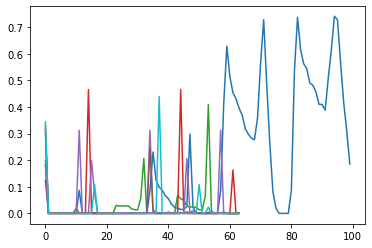

In [50]:
# dfs = myNeural.analysis.results_df

dfs = myNeural.analysis.trial_dataframes

# Plot by epoch
ax = None  # This plots everything on the same plot
for d in list(dfs.values())[:20]:
    # d['testAccReg'] = d['testAccReg'].apply(lambda x: float(x[7:-1]))
    ax = d.testAccReg.plot(ax=ax, legend=False)

In [45]:
list(dfs.values())[0].testAcc[0]

'tensor(0.5000)'

In [47]:
list(dfs.values())[0]

,trainAcc,testAcc,testAccReg,_metric,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,trial_id
0,tensor(0.8758),tensor(0.5000),0.1242,tensor(0.5000),0.069581,False,NaN,NaN,1,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-13,1622023033,0.069581,70272,Shaos-MBP,192.168.1.254,0.069581,0,1,bc997a9e
1,tensor(1.),tensor(0.5000),0.0000,tensor(0.5000),0.052200,False,NaN,NaN,2,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-13,1622023033,0.121781,70272,Shaos-MBP,192.168.1.254,0.121781,0,2,bc997a9e
2,tensor(1.),tensor(0.5000),0.0000,tensor(0.5000),0.035239,False,NaN,NaN,3,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-13,1622023033,0.157020,70272,Shaos-MBP,192.168.1.254,0.157020,0,3,bc997a9e
3,tensor(1.),tensor(0.5000),0.0000,tensor(0.5000),0.034031,False,NaN,NaN,4,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-13,1622023033,0.191051,70272,Shaos-MBP,192.168.1.254,0.191051,0,4,bc997a9e
4,tensor(1.),tensor(0.5000),0.0000,tensor(0.5000),0.038507,False,NaN,NaN,5,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-13,1622023033,0.229558,70272,Shaos-MBP,192.168.1.254,0.229558,0,5,bc997a9e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tensor(0.8514),tensor(0.7895),0.7276,tensor(0.7895),0.039657,False,NaN,NaN,96,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-17,1622023037,3.911294,70272,Shaos-MBP,192.168.1.254,3.911294,0,96,bc997a9e
96,tensor(0.9069),tensor(0.7370),0.5671,tensor(0.7370),0.041307,False,NaN,NaN,97,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-17,1622023037,3.952601,70272,Shaos-MBP,192.168.1.254,3.952601,0,97,bc997a9e
97,tensor(0.9557),tensor(0.6875),0.4193,tensor(0.6875),0.041675,False,NaN,NaN,98,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-17,1622023037,3.994276,70272,Shaos-MBP,192.168.1.254,3.994276,0,98,bc997a9e
98,tensor(0.9712),tensor(0.6410),0.3108,tensor(0.6410),0.042164,False,NaN,NaN,99,5100bdac85b64fa7b5da856dd3cb1e6e,2021-05-26_17-57-17,1622023037,4.036440,70272,Shaos-MBP,192.168.1.254,4.036440,0,99,bc997a9e
